# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El siguiente análisis de los datos proporcionados por la compañía de telecomunicaciones Megaline se basa en determinar cuál es la tarifa de prepago que genera más ingresos para la compañía. Para lograrlo haremos el análisis de datos con la información de 500 clientes. 

Es necesario realizar un pre-procesamiento de los datos de los datasets proporcionados y trabajando bajo las 2 tarifas mensionadas : "Surf" y "Ultimate", de esta forma trabajaremos para obtener el resultado deseado.

## Inicialización

In [1]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from matplotlib import pyplot as plt



In [2]:
sns.set(style="whitegrid", palette="gray")  # escala de grises
accent_color = "#9C99AC" 

custom_palette = {
    "ultimate": "#9999b6",  
    "surf": "#f4c2a1"       
}


In [3]:
def analizar_por_plan(df, columna, titulo=None):
    # Validación
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return
    if 'plan' not in df.columns:
        print("El DataFrame debe contener una columna 'plan'.")
        return

    # Agrupación por plan
    stats = df.groupby('plan')[columna].agg(['mean', 'var']).reset_index()
    stats.columns = ['plan', 'media', 'varianza']

    # Impresión de estadísticas
    print(f"Comparación por plan para la columna '{columna}':\n")
    for _, row in stats.iterrows():
        print(f"Plan: {row['plan']}")
        print(f"  Media: {row['media']:.2f}")
        print(f"  Varianza: {row['varianza']:.2f}")
        print("")

    # Comparación relativa si hay dos planes
    if len(stats) == 2:
        p1, p2 = stats.iloc[0], stats.iloc[1]
        media_diff_pct = abs(p1['media'] - p2['media']) / max(p1['media'], p2['media']) * 100
        varianza_diff_pct = abs(p1['varianza'] - p2['varianza']) / max(p1['varianza'], p2['varianza']) * 100
        print(f"Diferencia relativa entre medias: {media_diff_pct:.2f}%")
        print(f"Diferencia relativa entre varianzas: {varianza_diff_pct:.2f}%\n")

    # Gráfico de medias
    plt.figure(figsize=(12, 6))
    sns.barplot(data=stats, x='plan', y='media', color=accent_color)
    plt.title(f"Media por plan - {titulo or columna}")
    plt.xlabel("Plan")
    plt.ylabel("Media")
    plt.tight_layout()
    plt.show()

    # Gráfico de varianzas
    plt.figure(figsize=(12, 6))
    sns.barplot(data=stats, x='plan', y='varianza', color=accent_color)
    plt.title(f"Varianza por plan - {titulo or columna}")
    plt.xlabel("Plan")
    plt.ylabel("Varianza")
    plt.tight_layout()
    plt.show()


## Cargar datos

In [4]:
# Carga los archivos de datos en diferentes DataFrames

df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_msg = pd.read_csv("/datasets/megaline_messages.csv" )
df_plans = pd.read_csv("/datasets/megaline_plans.csv")
df_users = pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [6]:
# Imprime una muestra de los datos para las tarifas

display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


1. El dataframe de tarifas nos indica que en ninguna de nueestras columnas hay valores faltantes, porlo que podemos interpretar como una información resumida de las tarifas.
2. Tenemos un total de 8 columnas de las cuáles 6 de ellas son del tipo "int64" y solamente las columnas "usd_per_message" y "usd_per_minute" son float64. Será necesario cambiar los datos de "float64" a "int64".
3. Nuestra columna de "plan_name" es del tipo object.

Solo será necesario cambiar el tipo de datos usando el metodo de astype()


## Corregir datos

In [7]:
float_cols = df_plans.select_dtypes(include=['float64']).columns

df_plans[float_cols] = df_plans[float_cols].astype('int64')

print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   usd_monthly_pay        2 non-null      int64 
 4   usd_per_gb             2 non-null      int64 
 5   usd_per_message        2 non-null      int64 
 6   usd_per_minute         2 non-null      int64 
 7   plan_name              2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


## Enriquecer los datos

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [9]:
# Imprime una muestra de datos para usuarios
display(df_users.head())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


1. El datafram de usuarios nos indica la información general de nuestros clientes: Número de usuario, Nombre, Apellido, Edad, ciudad, fecha de registro, plan actual
2. La mayoría de columnas cuenta con toda la información, es decir no tenemos valores faltantes.
3. A excepción de la columna "Churn date" la que hace referencia a la fecha en la que el usuario dejo de usar nuestro servicio. Hay un dato interesante ya que solo hay 34 valores registrados de los 500 datos que nos proporciona el dataframe; esto significa que tenemos 466 usuarios sin una baja registrada lo que podría indicar que aún eran clientes en el periodo que se extrajeron estos datos.
4. Será necesario cambiar los tipos de datos de las columnas "reg_date" y "churn_date" porque su tipo de datos es objet y para su análisis lo ideal es trabajar bajo el tipo datetime .



### Corregir los datos

In [10]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d', errors='ignore')

print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enriquecer los datos


Dado que tenemos algunos usuarios sin fecha de cancelación, podemos calcular la antigüedad de cada usuario partiendo de la fecha de referencia de su registro



In [11]:
max_reg_date = df_users['reg_date'].max()

df_users['user_tenure_days'] = (max_reg_date - df_users['reg_date']).dt.days

print(df_users[['user_id', 'reg_date', 'user_tenure_days']].head())

   user_id   reg_date  user_tenure_days
0     1000 2018-12-24                 7
1     1001 2018-08-13               140
2     1002 2018-10-21                71
3     1003 2018-01-28               337
4     1004 2018-05-23               222


Dado el analisis podemos identificar la tendencia de registro o abandono por mes y año 

In [12]:
df_users['reg_month'] = df_users['reg_date'].dt.month

df_users['reg_year'] = df_users['reg_date'].dt.year

print(df_users[['user_id', 'reg_date', 'reg_month', 'reg_year']].head())

   user_id   reg_date  reg_month  reg_year
0     1000 2018-12-24         12      2018
1     1001 2018-08-13          8      2018
2     1002 2018-10-21         10      2018
3     1003 2018-01-28          1      2018
4     1004 2018-05-23          5      2018


Ahora podemos identificar en base a los datos si el usuario se encuentra activo o si ha dejado su suscripción

In [13]:
#Código si el usuario se mantiene activo
df_users['is_active'] = df_users['churn_date'].isnull()

print(df_users[['user_id', 'churn_date', 'is_active']].head())

#Código si el usuario canceló su suscripción
df_users['has_churned'] = df_users['churn_date'].notnull()

print(df_users[['user_id', 'churn_date', 'has_churned']].head())

   user_id churn_date  is_active
0     1000        NaT       True
1     1001        NaT       True
2     1002        NaT       True
3     1003        NaT       True
4     1004        NaT       True
   user_id churn_date  has_churned
0     1000        NaT        False
1     1001        NaT        False
2     1002        NaT        False
3     1003        NaT        False
4     1004        NaT        False


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [15]:
# Imprime una muestra de datos para las llamadas

display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


1. Podemos análisar que todas las columnas presentan valores por lo que no hay valores ausentes.
2. La columna "call_date" hace referencia a la fecha en la que se realizada cada llamada por cada usuario, sin embargo, es necesario modificar el tipo de dato ya que se encuentra como objeto, para ello es necesario convertirlo a un tipo de dato datetime.
3. La columna de "duration" hace referencia a la duración de cada llamada que realizan los usuarios, sin embargo para la compañias cada llamada se traslada a números enteros, por lo que si la llamada duro 30 segundos la compañias lo ve como si duro 1 minuto. Es por esto que es necesario convertir el tipo de dato de un float64 a un "int64"

### Corregir los datos

In [16]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [17]:
df_calls['duration'] = df_calls['duration'].astype('int64')

print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

Podemos identificar los días de la semana en los que cada llamada se realizo; esto nos permitiría encontrar una tendencia en la que identifiquemos en que día y horario hacen más uso de este servicio los usuarios.



In [18]:
df_calls['call_day_of_week'] = df_calls['call_date'].dt.day_name()

df_calls['call_hour'] = df_calls['call_date'].dt.hour

display(df_calls[['id', 'call_date', 'call_day_of_week']].head())
display(df_calls[['id', 'call_date', 'call_hour']].head())



,id,call_date,call_day_of_week
0,1000_93,2018-12-27,Thursday
1,1000_145,2018-12-27,Thursday
2,1000_247,2018-12-27,Thursday
3,1000_309,2018-12-28,Friday
4,1000_380,2018-12-30,Sunday


,id,call_date,call_hour
0,1000_93,2018-12-27,0
1,1000_145,2018-12-27,0
2,1000_247,2018-12-27,0
3,1000_309,2018-12-28,0
4,1000_380,2018-12-30,0


## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(df_msg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [20]:
# Imprime una muestra de datos para los mensajes

display(df_msg.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Al igual que como en los dataframes anteriores, será necesario cambiar el tipo de dato de la columna "message_date" ya que está almacenado como object y lo ideal, para futuros cálculos es que se almacene como datime

### Corregir los datos

In [21]:
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'], format='%Y-%m-%d')

print(df_msg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

1. Ahora que corregimos el formato de fechas podemos hacer un análisis de cuando se envío el mensaje, que mes, día, si fue en fin de semana entre otros factores. 

In [22]:
# Mes del mensaje
df_msg['message_month'] = df_msg['message_date'].dt.month_name()

# Día de la semana del mensaje
df_msg['message_day_of_week'] = df_msg['message_date'].dt.day_name()

# Fin de semana del mensaje
df_msg['is_weekend_message'] = df_msg['message_date'].dt.dayofweek >= 5

# Día del mes del mensaje
df_msg['message_day'] = df_msg['message_date'].dt.day

display(df_msg[['id', 'message_date', 'message_month', 'message_day_of_week', 'is_weekend_message', 'message_day']].head())

,id,message_date,message_month,message_day_of_week,is_weekend_message,message_day
0,1000_125,2018-12-27,December,Thursday,False,27
1,1000_160,2018-12-31,December,Monday,False,31
2,1000_223,2018-12-31,December,Monday,False,31
3,1000_251,2018-12-27,December,Thursday,False,27
4,1000_255,2018-12-26,December,Wednesday,False,26


## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [24]:
# Imprime una muestra de datos para el tráfico de internet

display(df_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


1. Al igual que como en los dataframes anteriores, será necesario cambiar el tipo de dato de la columna "session_date" ya que está almacenado como object y lo ideal, para futuros cálculos es que se almacene como datime
2. Tengo una duda, en la descripción del proyecto mencionan que para este mes todos los megabytes se redondean, de ser así, ¿es necesario que convierta el tipo de datos de la columna mb_used a un entero?

### Corregir los datos

In [25]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Enriquecer los datos

1. Ahora que corregimos el formato de fechas podemos hacer un análisis del uso de mb usados, que mes, día, si fue en fin de semana entre otros factores. La mejora es similar a lo que hicimos con el df pasado, sin embargo esto nos permite dar respuesta a las preguntas que pueden surgir al ver estos datos:
2. ¿Hay patrones temporales en el consumo de datos? ¿Varía el uso según el día de la semana o el mes?

In [26]:
# Mes de la sesión de internet
df_internet['session_month'] = df_internet['session_date'].dt.month_name()

# Día de la semana de la sesión de internet
df_internet['session_day_of_week'] = df_internet['session_date'].dt.day_name()

# Fin de semana de la sesión de internet
df_internet['is_weekend_session'] = df_internet['session_date'].dt.dayofweek >= 5

# Día del mes de la sesión de internet
df_internet['session_day'] = df_internet['session_date'].dt.day

display(df_internet[['id', 'session_date', 'session_month', 'session_day_of_week', 'is_weekend_session', 'session_day']].head())

,id,session_date,session_month,session_day_of_week,is_weekend_session,session_day
0,1000_13,2018-12-29,December,Saturday,True,29
1,1000_204,2018-12-31,December,Monday,False,31
2,1000_379,2018-12-28,December,Friday,False,28
3,1000_413,2018-12-26,December,Wednesday,False,26
4,1000_442,2018-12-27,December,Thursday,False,27


## Estudiar las condiciones de las tarifas

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10                0               0      surf  
1               70           7                0               0  ultimate  


1. El plan "ultimate" ofrece límites mucho más altos en mensajes, datos y minutos incluidos, pero también tiene una tarifa mensual significativamente mayor.
2. En ambos planes, los mensajes y minutos adicionales no tienen costo. Sin embargo, los datos adicionales sí se cobran, con una tarifa por GB que es mayor en el plan "surf".

Mencionado esto podemos determinar el comportamiento de nuestros usuarios para determinar si se mantienen dentro de los limites de su plan actual o incurren en costos adicionales; de esta forma se puede llevar acabo un análisis para futuras recomendaciones.

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [28]:
# =============================
# AGREGACIÓN POR USUARIO Y MES
# =============================

df_calls['month'] = df_calls['call_date'].dt.month_name()
df_msg['month'] = df_msg['message_date'].dt.month_name()
df_internet['month'] = df_internet['session_date'].dt.month_name()

# Total de minutos por usuario y mes
calls_duration = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
calls_duration.rename(columns={'duration': 'total_minutes'}, inplace=True)

# Número de llamadas por usuario y mes
calls_count = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_count.rename(columns={'id': 'call_count'}, inplace=True)

# Total de mensajes por usuario y mes
messages_count = df_msg.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_count.rename(columns={'id': 'total_messages'}, inplace=True)

# Total de MB usados por usuario y mes
internet_usage = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_usage.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)

# Combinar todos los datos por usuario y mes
user_month_usage = calls_duration.merge(calls_count, on=['user_id', 'month'], how='outer') \
    .merge(messages_count, on=['user_id', 'month'], how='outer') \
    .merge(internet_usage, on=['user_id', 'month'], how='outer')

# =============================
# INTEGRACIÓN DE USUARIOS Y PLANES
# =============================

# Agregar columna 'plan' desde df_users
user_month_usage = user_month_usage.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

# Agregar detalles del plan
user_month_usage = user_month_usage.merge(df_plans, left_on='plan', right_on='plan_name', how='left')
user_month_usage.drop(columns=['plan_name'], inplace=True)

# =============================
# CÁLCULOS DE REGLAS DE NEGOCIO
# =============================

# Rellenar posibles valores nulos antes del cálculo
user_month_usage[['total_minutes', 'call_count', 'total_messages', 'total_mb_used']] = \
    user_month_usage[['total_minutes', 'call_count', 'total_messages', 'total_mb_used']].fillna(0)

# Cálculo de excesos
user_month_usage['excess_minutes'] = np.maximum(0, user_month_usage['total_minutes'] - user_month_usage['minutes_included'])
user_month_usage['excess_messages'] = np.maximum(0, user_month_usage['total_messages'] - user_month_usage['messages_included'])
user_month_usage['excess_mb'] = np.maximum(0, user_month_usage['total_mb_used'] - user_month_usage['mb_per_month_included'])

# Convertir MB a GB facturables según política (1 GB cada 1023 MB)
user_month_usage['excess_gb'] = np.ceil(user_month_usage['excess_mb'] / 1024)

# =============================
# CÁLCULO DE INGRESOS
# =============================

user_month_usage['cost_minutes'] = user_month_usage['excess_minutes'] * user_month_usage['usd_per_minute']
user_month_usage['cost_messages'] = user_month_usage['excess_messages'] * user_month_usage['usd_per_message']
user_month_usage['cost_gb'] = user_month_usage['excess_gb'] * user_month_usage['usd_per_gb']

# Total adicional y total pagado
user_month_usage['total_extra_cost'] = user_month_usage['cost_minutes'] + user_month_usage['cost_messages'] + user_month_usage['cost_gb']
user_month_usage['total_paid'] = user_month_usage['usd_monthly_pay'] + user_month_usage['total_extra_cost']

# =============================
# INSPECCIÓN FINAL
# =============================

# Mostrar muestra de los resultados
display(user_month_usage[['user_id', 'month', 'plan', 'call_count', 'total_minutes', 'total_messages', 'total_mb_used',
                          'excess_minutes', 'excess_messages', 'excess_mb', 'excess_gb',
                          'cost_minutes', 'cost_messages', 'cost_gb', 'usd_monthly_pay', 'total_paid']].head())

print(user_month_usage.info())


,user_id,month,plan,call_count,total_minutes,total_messages,total_mb_used,excess_minutes,excess_messages,excess_mb,excess_gb,cost_minutes,cost_messages,cost_gb,usd_monthly_pay,total_paid
0,1000,December,ultimate,16.0,108.0,11.0,1901.47,0.0,0.0,0.00,0.0,0.0,0.0,0.0,70,70.0
1,1001,August,surf,27.0,160.0,30.0,6919.15,0.0,0.0,0.00,0.0,0.0,0.0,0.0,20,20.0
2,1001,December,surf,56.0,368.0,44.0,19369.18,0.0,0.0,4009.18,4.0,0.0,0.0,40.0,20,60.0
3,1001,November,surf,64.0,379.0,36.0,18504.30,0.0,0.0,3144.30,4.0,0.0,0.0,40.0,20,60.0
4,1001,October,surf,65.0,348.0,53.0,22330.49,0.0,3.0,6970.49,7.0,0.0,0.0,70.0,20,90.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   object 
 2   total_minutes          2293 non-null   float64
 3   call_count             2293 non-null   float64
 4   total_messages         2293 non-null   float64
 5   total_mb_used          2293 non-null   float64
 6   plan                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   mb_per_month_included  2293 non-null   int64  
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_pay        2293 non-null   int64  
 11  usd_per_gb             2293 non-null   int64  
 12  usd_per_message        2293 non-null   int64  
 13  usd_per_minute         2293 non-null   int64  
 14  excess_minutes         2293 non-null   float64
 15  exce

In [29]:
user_month_usage.query("user_id == 1001")

,user_id,month,total_minutes,call_count,total_messages,total_mb_used,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_minute,excess_minutes,excess_messages,excess_mb,excess_gb,cost_minutes,cost_messages,cost_gb,total_extra_cost,total_paid
1,1001,August,160.0,27.0,30.0,6919.15,surf,50,15360,500,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,20.0
2,1001,December,368.0,56.0,44.0,19369.18,surf,50,15360,500,...,0,0.0,0.0,4009.18,4.0,0.0,0.0,40.0,40.0,60.0
3,1001,November,379.0,64.0,36.0,18504.30,surf,50,15360,500,...,0,0.0,0.0,3144.30,4.0,0.0,0.0,40.0,40.0,60.0
4,1001,October,348.0,65.0,53.0,22330.49,surf,50,15360,500,...,0,0.0,3.0,6970.49,7.0,0.0,0.0,70.0,70.0,90.0
5,1001,September,278.0,49.0,44.0,13314.82,surf,50,15360,500,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,20.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

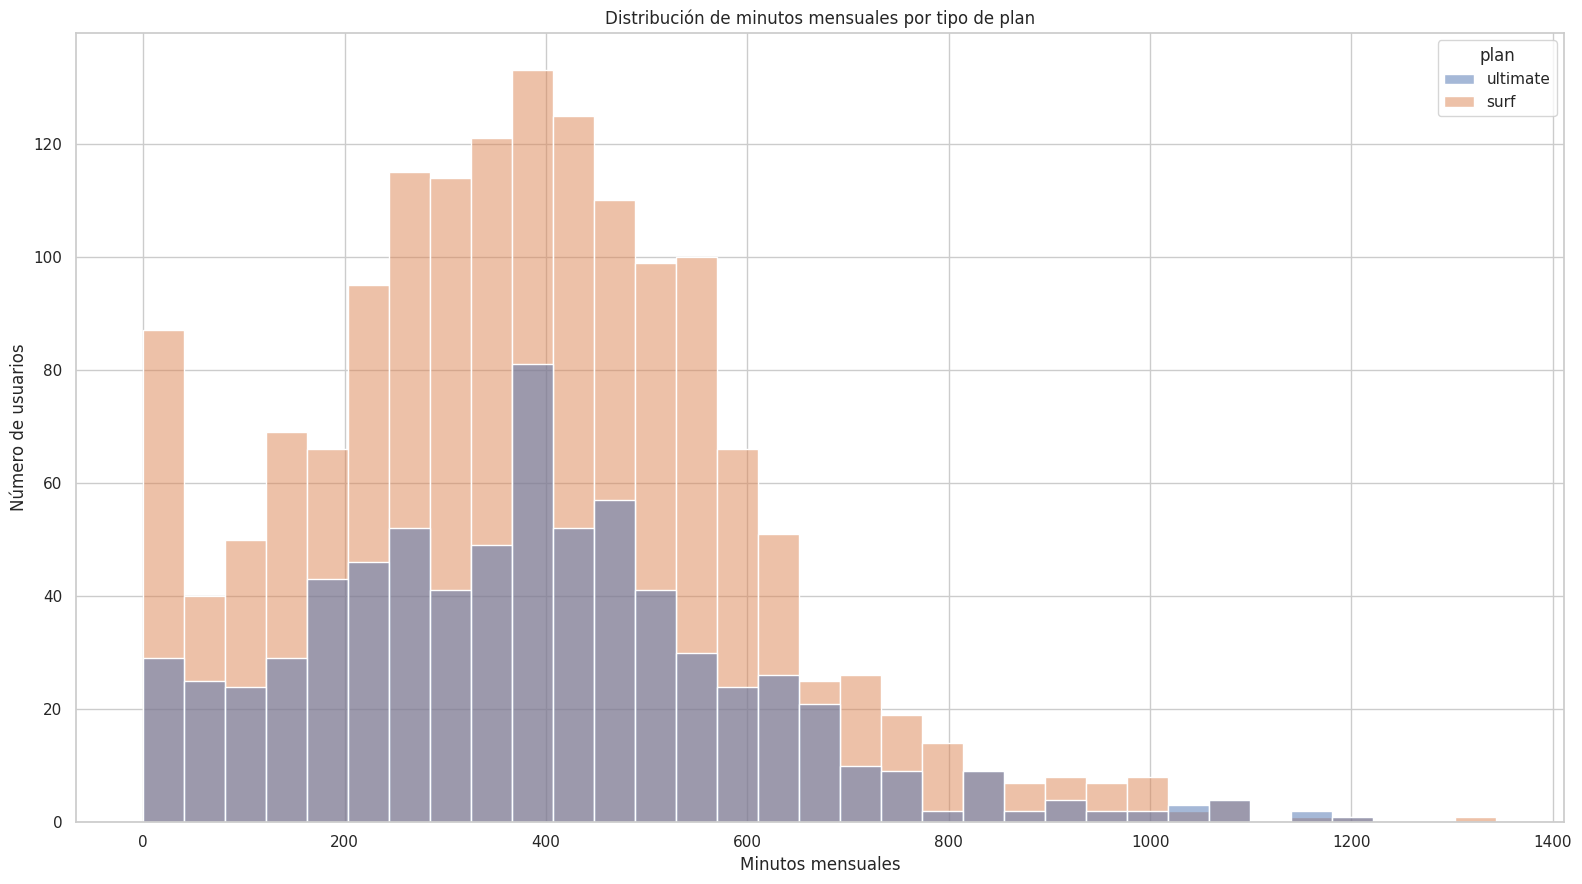

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sns.set(style="whitegrid")

# Histograma de minutos mensuales por tipo de plan
plt.figure(figsize=(16, 9))
sns.histplot(data=user_month_usage, x="total_minutes", hue="plan", kde=False, bins="auto")
plt.title("Distribución de minutos mensuales por tipo de plan")
plt.xlabel("Minutos mensuales")
plt.ylabel("Número de usuarios")
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

Comparación por plan para la columna 'total_minutes':

Plan: surf
  Media: 381.03
  Varianza: 43728.03

Plan: ultimate
  Media: 382.29
  Varianza: 45938.01

Diferencia relativa entre medias: 0.33%
Diferencia relativa entre varianzas: 4.81%



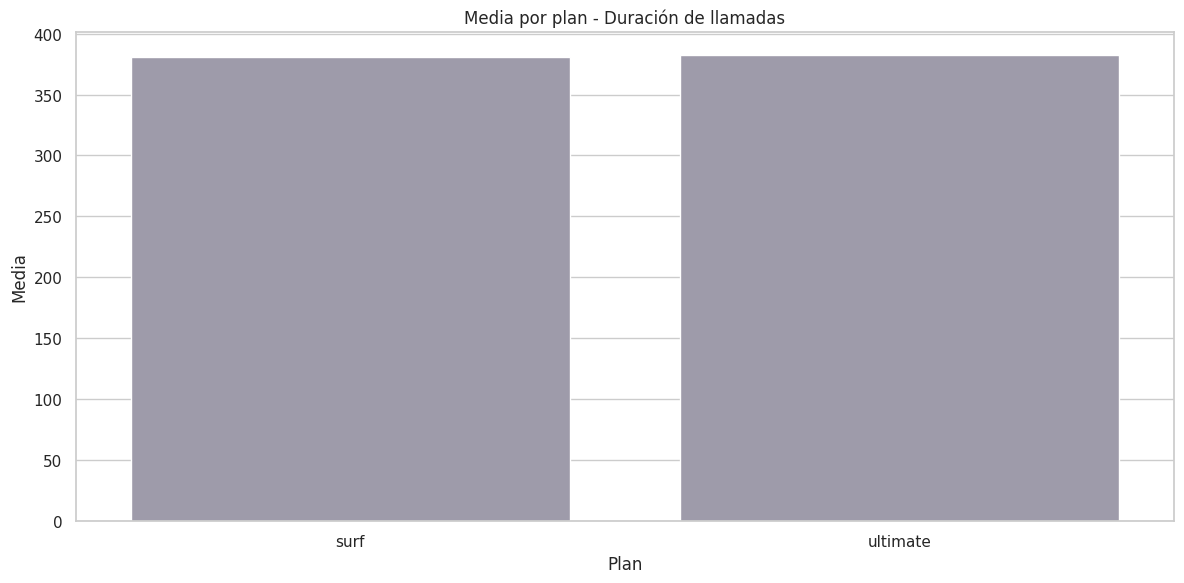

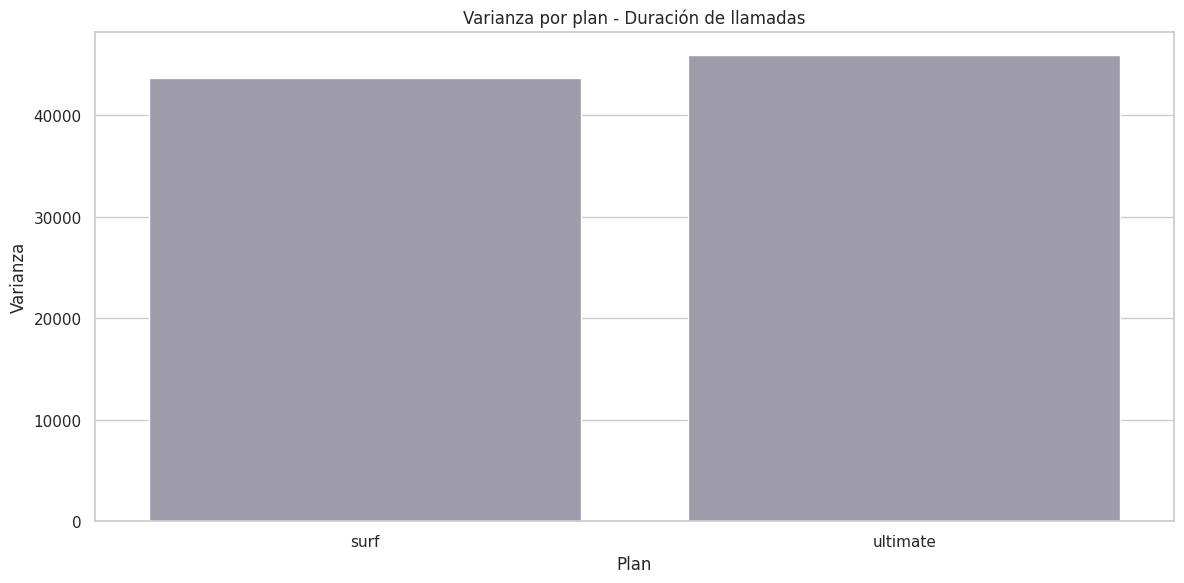

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.
analizar_por_plan(user_month_usage, 'total_minutes', titulo="Duración de llamadas")


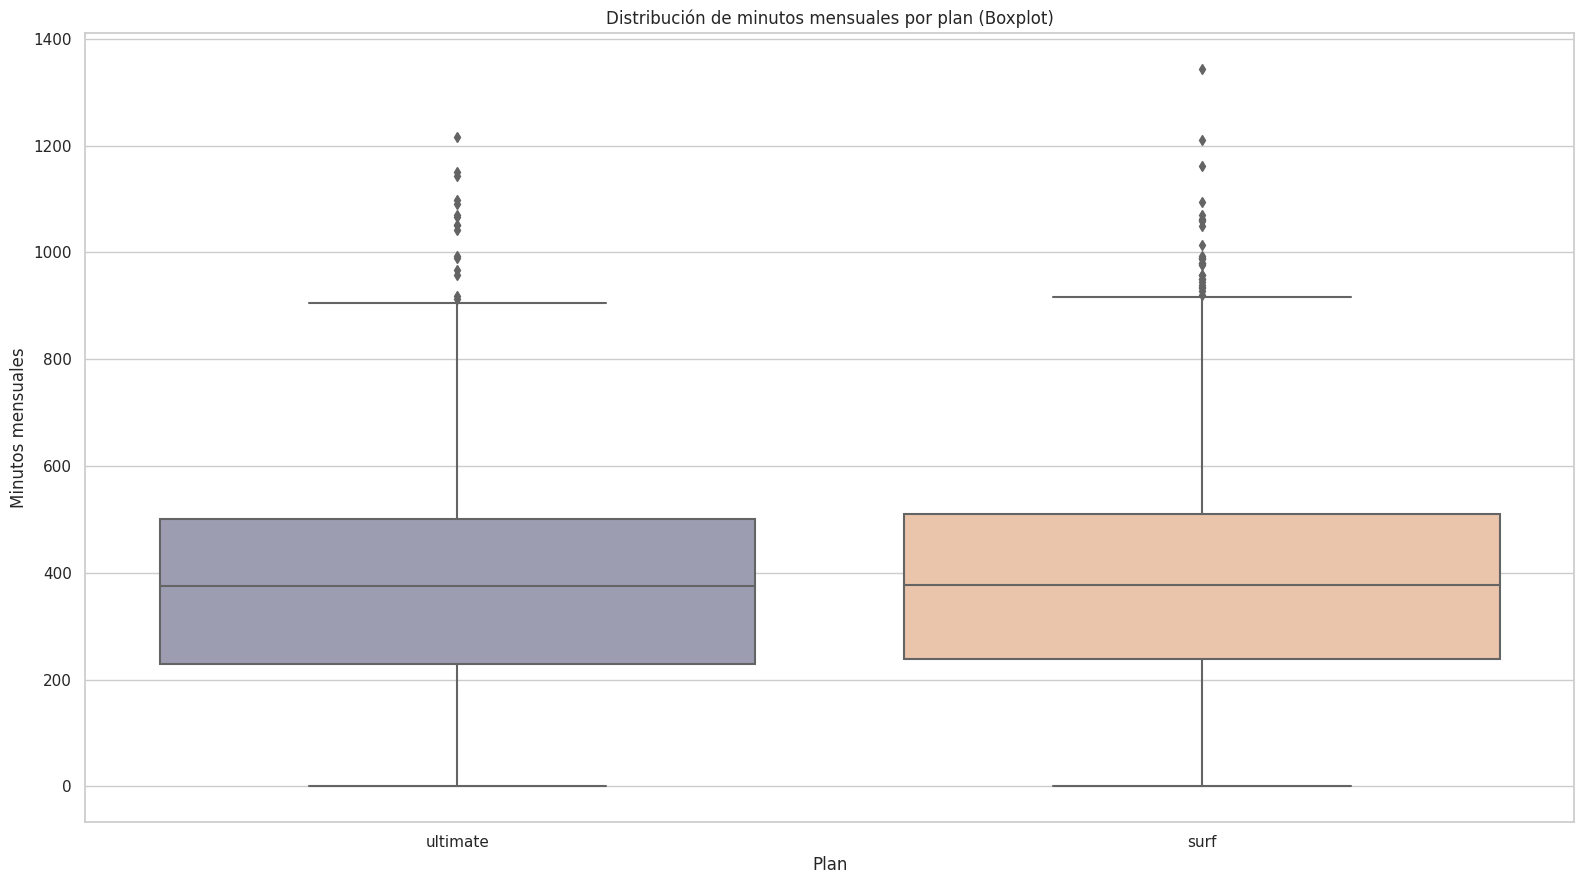

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(16, 9))
sns.boxplot(data=user_month_usage, x="plan", y="total_minutes", palette=custom_palette)
plt.title("Distribución de minutos mensuales por plan (Boxplot)")
plt.xlabel("Plan")
plt.ylabel("Minutos mensuales")
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

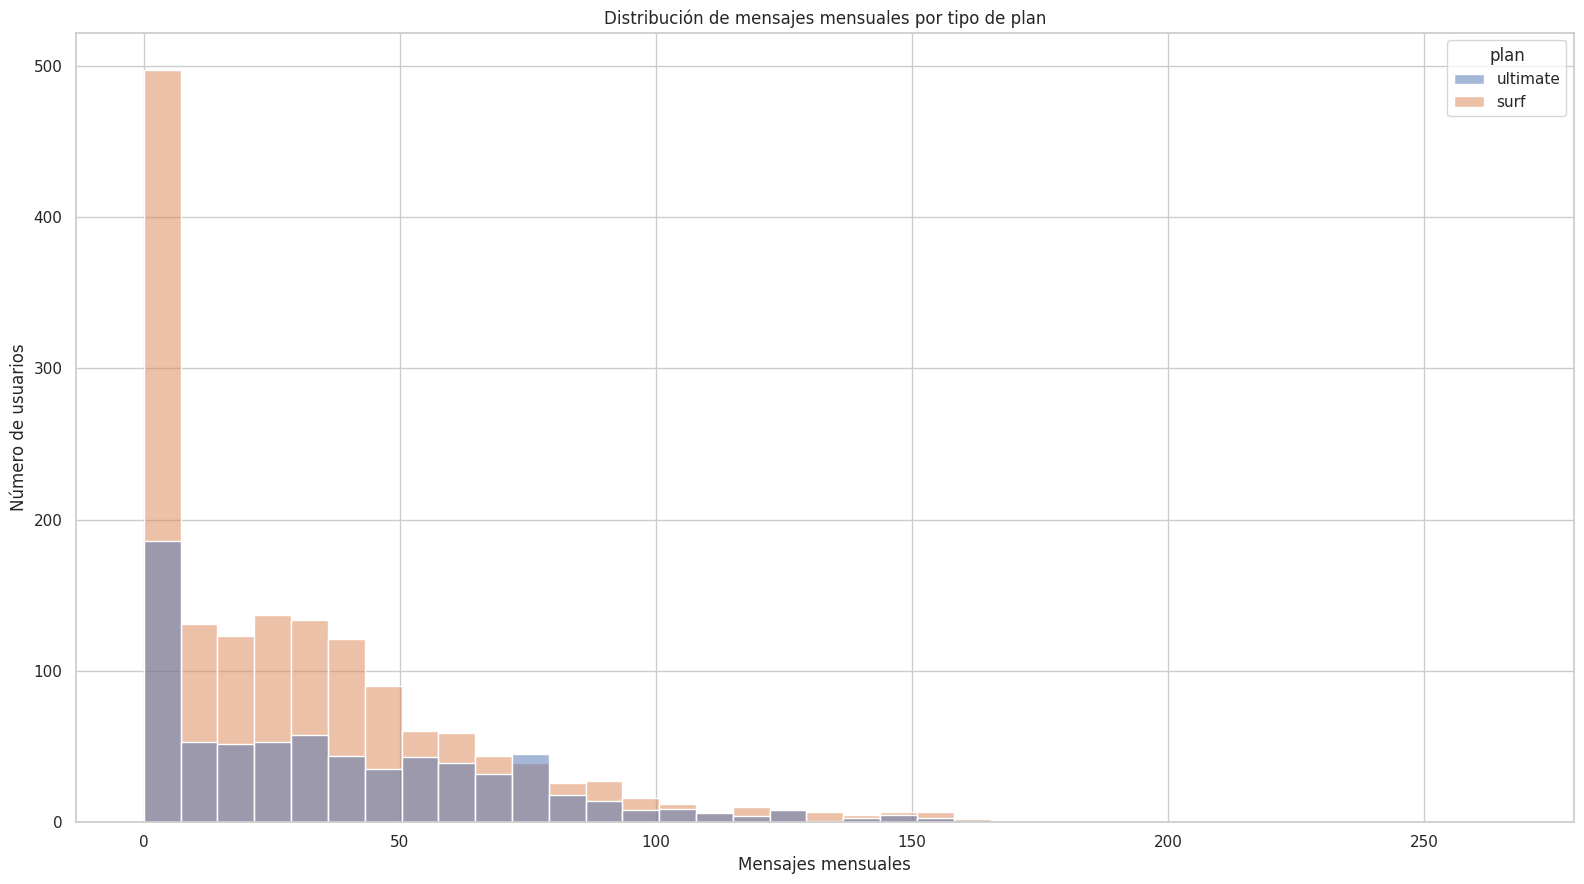

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sns.set(style="whitegrid")

# Histograma de mensajes mensuales por tipo de plan
plt.figure(figsize=(16, 9))
sns.histplot(data=user_month_usage, x="total_messages", hue="plan", kde=False, bins="auto")
plt.title("Distribución de mensajes mensuales por tipo de plan")
plt.xlabel("Mensajes mensuales")
plt.ylabel("Número de usuarios")
plt.tight_layout()
plt.show()

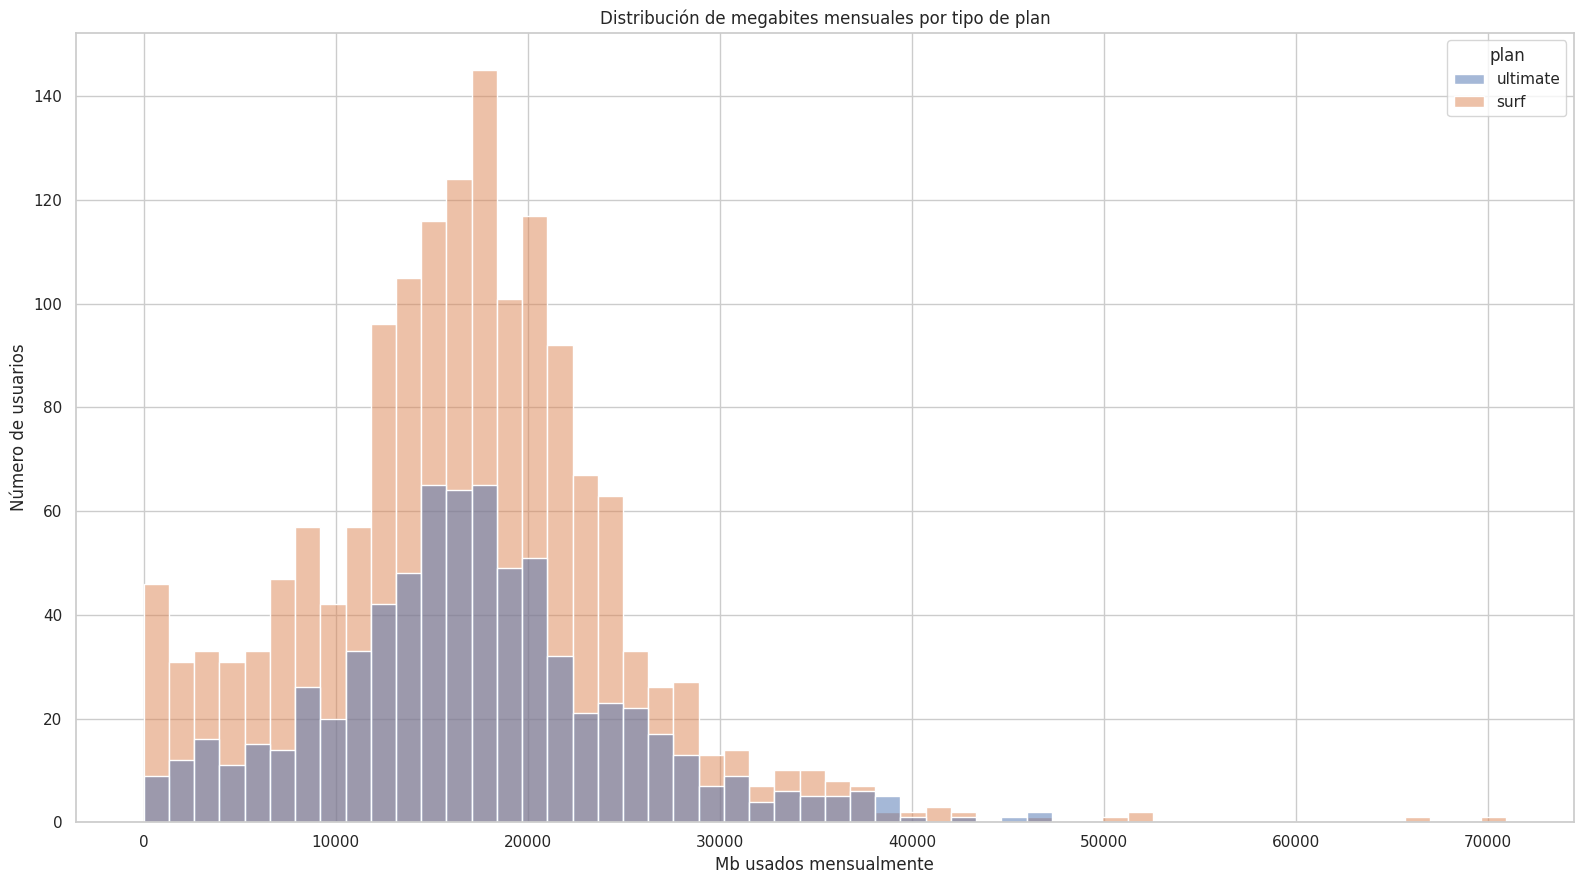

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
sns.set(style="whitegrid")

# Histograma de mensajes mensuales por tipo de plan
plt.figure(figsize=(16, 9))
sns.histplot(data=user_month_usage, x="total_mb_used", hue="plan", kde=False, bins="auto")
plt.title("Distribución de megabites mensuales por tipo de plan")
plt.xlabel("Mb usados mensualmente")
plt.ylabel("Número de usuarios")
plt.tight_layout()
plt.show()

En general, los usuarios del plan "ultimate" tienden a enviar un mayor número de mensajes por mes en comparación con los usuarios del plan "surf". Esto se evidencia tanto en la posición más alta de la mediana en los boxplots para la mayoría de los meses, como en los valores promedio (media y mediana) más elevados en las estadísticas descriptivas. Esta tendencia es esperable, ya que el plan "ultimate" ofrece un límite de mensajes mucho más alto, lo que reduce la restricción y puede alentar un uso más liberal del servicio de mensajería.

### Internet

La distribución del consumo de MB para los usuarios del plan "surf" se concentra en valores más bajos, lo que indica un uso más moderado de datos. Esto probablemente se debe a la menor cantidad de datos incluidos en su plan, lo que obliga a los usuarios a ser más conscientes y restrictivos en su consumo para evitar cargos por exceso.

El consumo de MB para los usuarios del plan "ultimate" tiende a desplazarse hacia valores más altos en comparación con la distribución del plan "surf". Esto sugiere que, en promedio, los suscriptores del plan "ultimate" utilizan una mayor cantidad de datos móviles cada mes. Esta diferencia es consistente con la mayor asignación de datos que ofrece el plan "ultimate".

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [39]:

#CALCULÓ DE INGRESOS POR PLAN
plan_revenue = user_month_usage.groupby('plan')['total_paid'].sum()

print("Ingresos totales por plan:")
print(plan_revenue)


Ingresos totales por plan:
plan
surf        92260.0
ultimate    52066.0
Name: total_paid, dtype: float64


In [40]:
print("\nEstadísticas descriptivas de los ingresos por usuario y mes para cada plan:")
print("\nEstadísticas para el plan Surf:")
print(user_month_usage[user_month_usage['plan'] == 'surf']['total_paid'].describe())



Estadísticas descriptivas de los ingresos por usuario y mes para cada plan:

Estadísticas para el plan Surf:
count    1573.000000
mean       58.652257
std        54.456269
min        20.000000
25%        20.000000
50%        40.000000
75%        80.000000
max       570.000000
Name: total_paid, dtype: float64


In [41]:
print("\nEstadísticas para el plan Ultimate:")
print(user_month_usage[user_month_usage['plan'] == 'ultimate']['total_paid'].describe())


Estadísticas para el plan Ultimate:
count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_paid, dtype: float64


A pesar de tener un ingreso promedio por usuario ligeramente menor (implícito al comparar con las estadísticas del plan Ultimate donde la mayoría paga la tarifa base), el plan Surf ha generado considerablemente más ingresos totales que el plan Ultimate en el período analizado.

1. Hay un mayor número de suscriptores del plan Surf: La diferencia en los ingresos totales podría estar influenciada por el período de tiempo que abarcan los datos. Si el plan Surf ha existido por más tiempo o ha tenido campañas de marketing más exitosas, podría tener una base de usuarios más grande.


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [43]:
# Prueba las hipótesis

# Separar los ingresos para cada plan
ultimate_income = user_month_usage[user_month_usage['plan'] == 'ultimate']['total_paid']
surf_income = user_month_usage[user_month_usage['plan'] == 'surf']['total_paid']

#Realizar la prueba t de Welch (para varianzas desiguales)
# equal_var=False indica que no asumimos varianzas iguales

t_statistic, p_value = st.ttest_ind(ultimate_income, surf_income, equal_var=False)

# Valor alfa (nivel de significancia)
alpha = 0.05

# Imprimir los resultados de la prueba
print(f"Estadístico t: {t_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")
print(f"Valor alfa: {alpha}")

if p_value < alpha:
    print("\nRechazamos la hipótesis nula.")
    print("Existe una diferencia estadísticamente significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.")
else:
    print("\nNo rechazamos la hipótesis nula.")
    print("No hay evidencia estadísticamente significativa para afirmar que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")


Estadístico t: 9.506
Valor p: 0.000
Valor alfa: 0.05

Rechazamos la hipótesis nula.
Existe una diferencia estadísticamente significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis

# Fusionar user_month_usage con df_users para obtener la ciudad de cada usuario
user_month_usage = pd.merge(user_month_usage, df_users[['user_id', 'city']], on='user_id', how='left')

# Definir el área NY-NJ
ny_nj_cities = ['New York-Newark-Jersey City, NY-NJ-PA MSA']

# Crear grupos para la prueba
ny_nj_income = user_month_usage[user_month_usage['city'].isin(ny_nj_cities)]['total_paid']
otras_regiones_income = user_month_usage[~user_month_usage['city'].isin(ny_nj_cities)]['total_paid']

# Realizar la prueba t de Welch
t_statistic, p_value = st.ttest_ind(ny_nj_income, otras_regiones_income, equal_var=False, nan_policy='omit')

# Valor alfa
alpha = 0.05

# Imprimir los resultados de la prueba
print(f"Estadístico t: {t_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")
print(f"Valor alfa: {alpha}")

# Tomar una decisión basada en el valor p y alfa
if p_value < alpha:
    print("\nRechazamos la hipótesis nula.")
    print("Existe una diferencia estadísticamente significativa entre los ingresos promedio de los usuarios del área NY-NJ y los usuarios de otras regiones.")
else:
    print("\nNo rechazamos la hipótesis nula.")
    print("No hay evidencia estadísticamente significativa para afirmar que los ingresos promedio de los usuarios del área NY-NJ son diferentes de los usuarios de otras regiones.")



## Conclusión general

1. Con un nivel de significancia de 0.05, existe evidencia estadísticamente significativa para afirmar que los ingresos promedio generados por los usuarios del plan Ultimate son diferentes de los ingresos promedio generados por los usuarios del plan Surf.

2. La dirección de esta diferencia (si el promedio de Ultimate es mayor o menor que el de Surf) se puede determinar observando las medias de los ingresos que calculamos previamente para cada plan. Si la media de ultimate_income era mayor que la media de surf_income, entonces la prueba confirma que esta diferencia no es solo por azar, sino que es estadísticamente significativa en la población de usuarios.

3. Al igual que en la prueba anterior, estamos comparando las medias de dos grupos independientes (usuarios del área NY-NJ y usuarios de otras regiones) para una variable continua (ingresos). Por lo tanto, la prueba estadística adecuada es la prueba t de Student para muestras independientes (o prueba t de dos muestras independientes).

# Comentario general del revisor 2a iteración

Hola Hesus! Un gusto, agradezco mucho tus observaciones, no he podido continuar mi proyecto porque hay un error que no encuentro como corregirlo, al parecer en primer lugar no estaba definida la plabra "month", esto en mi código de la celda 2.1.3.1.

Y adicional tengo otro error en la celda de código 2.12 , crees que puedas ayudarme a identificarlo?



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>A resolver ❗</b> - He revisado tu proyecto y me encontré con algunos problemas estructurales importantes en la sección de agregación por usuario y mes.

Lamentablemente, **no pude hacer una revisión detallada** porque tu código presentaba **variables no definidas**, como `calls_per_month`, lo que rompe la ejecución y sugiere que la lógica de tu solución se perdió en ciertos puntos.

📌 En concreto, **te faltó definir `calls_per_month`**, que debería contener el número de llamadas por usuario y por mes. Lo correcto hubiera sido usar:

```python
calls_per_month = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id': 'call_count'})
```

Esta variable es crucial porque después intentas hacer merges usando `call_month`, `message_month`, `session_month`, lo que genera ambigüedad y problemas al momento de combinar los datos.

---

### ✨ Propuesta de solución

Para ayudarte, he dejado una **guía refactorizada de código** donde simplifico y organizo la agregación de datos **usando `groupby` correctamente**, asegurando que todo se integre en un solo `DataFrame` (`user_month_usage`). Esto permite realizar análisis más claros y te ayuda a evitar errores comunes.

---

### 📊 Análisis visual – Sección de Gráficos

En la sección de análisis, te dejo también una propuesta de cómo deberían verse los **gráficos de comparación**. Lo mejor sería definir **funciones reutilizables** para trazar los gráficos (por ejemplo, comparar uso por plan), en lugar de repetir código.

👩‍🏫 Consejo: considera usar **`seaborn (sns)`** en lugar de `matplotlib`, ya que:
- Es más limpio visualmente (sí, te lo digo de frente: matplotlib es *feo* 😅).
- Requiere menos configuración para obtener resultados estéticos.
- Es más intuitivo para gráficos de comparación.

He dejado un ejemplo claro de cómo deben verse los gráficos de la **sección 1**, y te recomiendo **replicar ese mismo enfoque** para las siguientes secciones.

---

### 📐 Prueba de hipótesis – Sección final

En la parte de pruebas estadísticas, aún no es necesario que ejecutes todos los pasos, pero **sí es importante que investigues por tu cuenta** los siguientes temas:

- ¿Cuáles son los **supuestos para aplicar una prueba de hipótesis** correctamente?
- ¿Qué significa y **para qué sirve `equal_var`** en la función `ttest_ind()`?
- ¿Por qué estamos usando una prueba de hipótesis aquí?
- ¿Cuál es la **hipótesis nula y alternativa** que deberías plantear?
- ¿Cómo se **selecciona el valor de alfa** (`alpha`) y qué significa?

👉 Además, recuerda que cuando hagas la prueba de hipótesis para comparar ingresos de usuarios de **NY-NJ**, **no te debería salir `NaN` en ningún caso**. Muchos alumnos tienen este problema porque **no revisan cómo aparece escrita la ciudad en los registros**. Usa `.unique()` o `.value_counts()` para investigar eso antes de agrupar.

---

✨ Estoy seguro de que con esta guía podrás reestructurar bien tu proyecto. Si decides reutilizar el código que propongo o escribir tus propias funciones, ambas opciones son válidas mientras respetes la lógica que se espera para este análisis.

¡Sigue adelante con tu práctica! 🚀
</div>


# Comentario de Segunda Iteración

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un buen dominio en la lectura y transformación de datos, así como en la aplicación de agrupamientos y funciones para analizar patrones de comportamiento musical. A lo largo del notebook, se observa una evolución clara en tu lógica analítica y una mejora en la organización del código. ¡Excelente trabajo al seguir los principios del análisis estructurado y al aplicar funciones reutilizables!

---

### Puntos Positivos:

- **Preprocesamiento robusto:** Estandarizaste correctamente nombres de columnas y trataste duplicados explícitos e implícitos con precisión.
- **Función `number_tracks()` bien construida:** Modular y reutilizable, permite filtrar eficientemente por ciudad y día.
- **Análisis lógico y coherente:** Interpretaste correctamente los patrones por día y ciudad, aportando reflexiones relevantes que demuestran pensamiento crítico.
- **Aplicación del enfoque dividir-aplicar-combinar:** Bien ejecutado, tanto en agrupamientos como en conteo por categorías específicas.

---

### Áreas para Seguir Investigando:

- **Visualización de resultados comparativos:** Considera graficar las diferencias de comportamiento por ciudad y día con `matplotlib` o `seaborn`.
- **Automatización de comparativas múltiples:** Usar bucles o estructuras como `itertools.product()` para evaluar combinaciones ciudad-día en bloque.
- **Pruebas estadísticas formales:** Más adelante, cuando avances en tu aprendizaje, podrías aplicar test de hipótesis (como chi-cuadrado) para confirmar si las diferencias entre ciudades son estadísticamente significativas.
- **Documentación y narrativa analítica:** Fortalece tu habilidad de contar una historia con los datos, conectando los hallazgos con posibles recomendaciones para negocio.

---

¡Sigue trabajando con esta energía y enfoque! Tienes una excelente base como analista de datos. 🚀🎧💪

</div>

